# Exploring PyTorch to Train Neural Networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch


Bad key "text.kerning_factor" on line 4 in
C:\Users\rithw\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### Single layer Neural Network

In [2]:
features = torch.randn((1,5))
weights = torch.randn_like(features)
bias = torch.randn(1,1)

In [3]:
def activation(x):
    
    return (1/(1+torch.exp(-x)))

In [4]:
features

tensor([[-1.1097, -0.2997, -0.8312,  0.4278, -0.7203]])

In [5]:
weights

tensor([[ 1.4557,  0.1983, -0.2474,  1.1431, -0.5994]])

In [6]:
# Using torch.mm function and Transpose function
y = activation(torch.mm(features,torch.transpose(weights,0,1)) + bias)
y

tensor([[0.1517]])

In [7]:
# resize weights and torch.mm
y = activation(torch.mm(features,weights.view(5,1)) + bias)
y

tensor([[0.1517]])

In [8]:
# Torch sum function
y = activation (torch.sum(features*weights) + bias)
y

tensor([[0.1517]])

In [9]:
y

tensor([[0.1517]])

### Multi-Layer Neural Network

In [10]:
# Multi Layer Neural Network

features = torch.randn(1,3)

n_input = features.shape[1]
n_hidden = 2
n_output = 1


W1 = torch.randn((n_input, n_hidden))
W2 = torch.randn((n_hidden,n_output))

B1 = torch.randn((1,n_hidden))
B2 = torch.randn((1,n_output))

In [11]:
h = activation(torch.mm(features,W1) + B1)
out = activation(torch.mm(h,W2) + B2)
out

tensor([[0.6186]])

### Numpy to Pytorch and back

In [12]:
a = np.random.rand(3,3)
a

array([[0.22007847, 0.57508687, 0.22373707],
       [0.84247883, 0.21573173, 0.45499813],
       [0.04124779, 0.05926145, 0.6141546 ]])

In [13]:
b = torch.from_numpy(a)
b

tensor([[0.2201, 0.5751, 0.2237],
        [0.8425, 0.2157, 0.4550],
        [0.0412, 0.0593, 0.6142]], dtype=torch.float64)

In [14]:
b.numpy()

array([[0.22007847, 0.57508687, 0.22373707],
       [0.84247883, 0.21573173, 0.45499813],
       [0.04124779, 0.05926145, 0.6141546 ]])

In [15]:
b.mul_(2)

tensor([[0.4402, 1.1502, 0.4475],
        [1.6850, 0.4315, 0.9100],
        [0.0825, 0.1185, 1.2283]], dtype=torch.float64)

In [16]:
a

array([[0.44015695, 1.15017375, 0.44747414],
       [1.68495766, 0.43146346, 0.90999625],
       [0.08249557, 0.11852291, 1.22830919]])

When we use inplace operations to perform something on our tensors, it will get updated to the numpy array as well since the memory is shared betweeen Numpy array and PyTorch Tensor

### Neural Networks with PyTorch

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [18]:
from torchvision import datasets,transforms 

In [19]:
# Defining a transform to Normalize the data
transforms = transforms.Compose([transforms.ToTensor()]) #, transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5]),])

In [20]:
# Importing the dataset
trainset = datasets.MNIST('MNIST_data/', download=True, train = True, transform=transforms)

In [21]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle=True )

In [22]:
for image, label in trainloader:
    print(type(image))
    print(image.shape)
    print(label.shape)
    break

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [23]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

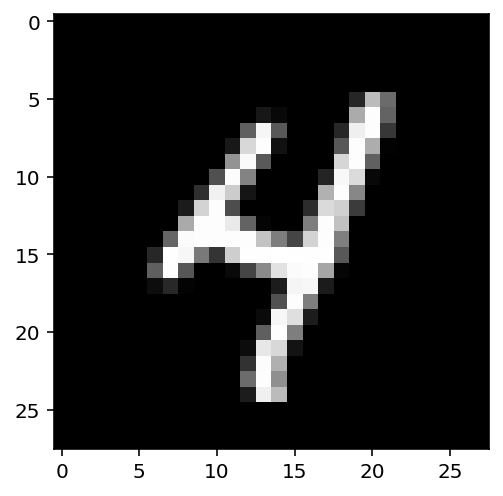

In [24]:
plt.imshow(images[1].numpy().squeeze(), cmap="gray")

In [25]:
def activation(x):
    return (1/(1+torch.exp(-x)))

In [26]:
n_input = 784
n_hidden = 256
n_output = 10

inputs = images.view(64, 784)

W1 = torch.randn((n_input, n_hidden))
W2 = torch.randn((n_hidden, n_output))

B1 = torch.randn((1,n_hidden))
B2 = torch.randn((1,n_output))

In [27]:
h = activation(torch.mm(inputs,W1) + B1)
output = torch.mm(h,W2) + B2

In [28]:
output.shape

torch.Size([64, 10])

In [30]:
# Implementing the Softmax Function to get the Probability Distribution

def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim = 1).view(-1,1)


In [31]:
softmax(output);

In [32]:
torch.sum(softmax(output), dim = 1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])

## Using PyTorch's nn module

In [33]:
from torch import nn

In [34]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Defining the Hidden and Output Layers
        
        self.hidden_1 = nn.Linear(784, 128)
        self.hidden_2 = nn.Linear(128, 64)
        self.output = nn.Linear(64,10)
    
        # Defining the Sigmoid and Softmax activation functions
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.hidden_1(x)
        x = self.sigmoid(x)
        x = self.hidden_2(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x
        

## Using PyTorch's nn module andtorch.nn.functional 

In [35]:
import torch.nn.functional as F

In [36]:
class Network_F(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.hidden_1 = nn.Linear(784,128)
        self.hidden_2 = nn.Linear(128,64)
        self.output = nn.Linear(64, 10)
    
    def forward(self,x):
        
        x = F.sigmoid(self.hidden_1(x))
        x = F.sigmoid(self.hidden_2(x))
        x = F.softmax(self.output(x), dim = 1)
        
        return x
        

### Using ReLu Activation Function

In [37]:
class Network_ReLu(nn.Module):

    def __init__(self):
        super().__init__()
        
        self.hidden_1 = nn.Linear(784,128)
        self.hidden_2 = nn.Linear(128,64)
        self.output = nn.Linear(64,10)
        
    def forward(self,x):
        
        x = F.relu(self.hidden_1(x))
        x = F.relu(self.hidden_2(x))
        x = F.softmax(self.output(x), dim = 1)
        
        return x

In [38]:
model = Network()
model

Network(
  (hidden_1): Linear(in_features=784, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [39]:
model_F = Network_F()
model_F

Network_F(
  (hidden_1): Linear(in_features=784, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [40]:
model_relu = Network_ReLu()
model_relu

Network_ReLu(
  (hidden_1): Linear(in_features=784, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [41]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [42]:
model = Network()
model

Network(
  (hidden_1): Linear(in_features=784, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

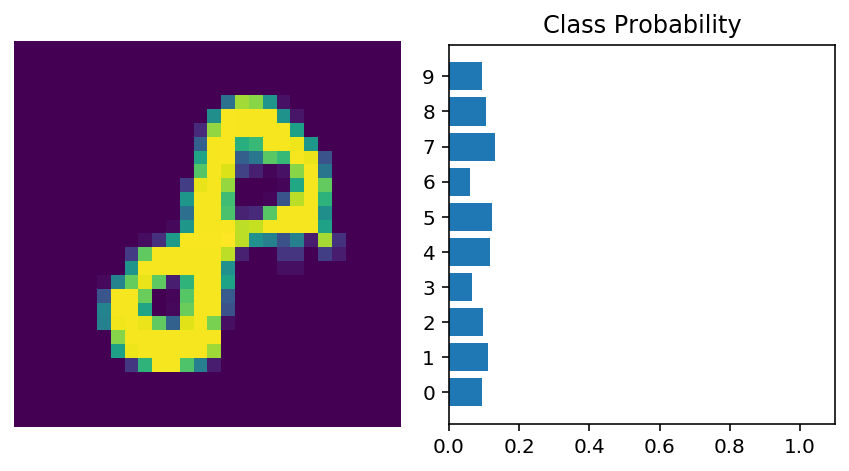

In [43]:
#Predicting using our Network


images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
#helper.view_classify(images[0].view(1, 28, 28), ps)
view_classify(images[0].view(1, 28, 28), ps)


### nn.squential and Loss function

In [44]:
# Building a feed forward network
model_seq = nn.Sequential(nn.Linear(784,128), nn.ReLU(), nn.Linear(128,64), nn.ReLU(), nn.Linear(64,10), nn.LogSoftmax(dim=1))

# Defining the loss :- Negative Log likelihood loss
criterion = nn.NLLLoss()

# Grabbing the data
dataiter = iter(trainloader)
images,labels = dataiter.next()

# Flatten Images
images = images.view(images.shape[0], -1)

# Forward Pass, get the Logits
logits = model_seq(images)

# Get the loss

loss = criterion(logits, labels)
loss

tensor(2.3349, grad_fn=<NllLossBackward>)

# The steps for Training a Neural Network in PyTorch :-

#### 1. Create a network by defining the input layers, hidden layers and their activations functions

#### 2. Define the Criterion :- the type of loss you want to use for a network

#### 3. Get the data you want to train the Neural Network on

#### 4. Make a Forward Pass through the Network and get the Loss

#### 5. Calculate the gradients of the parameters (Backpropagation) : loss.backward()

#### 6. Use optimizer : import from torch import optim to update the weights using the gradients

In [45]:
from torch import optim

In [46]:
optimizer = optim.SGD(model_seq.parameters(), lr = 0.01)

In [47]:
torch.set_grad_enabled(True)

#### Using Autograd to calculate the gradients

In [48]:
# Using Autograd to calculate the gradients

print("Initial Weight - ", model_seq[0].weight)

images,labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)


# Clearing the gradients. Important to do this because gradients are accumulated
optimizer.zero_grad()

criterion = nn.NLLLoss()

results = model_seq(images)

loss = criterion(results, labels)

print(loss)

loss.backward()

print(" Gradient - ", model_seq[0].weight.grad)

Initial Weight -  Parameter containing:
tensor([[-0.0248,  0.0319, -0.0023,  ...,  0.0156,  0.0047,  0.0110],
        [ 0.0277,  0.0033,  0.0004,  ..., -0.0074,  0.0118,  0.0147],
        [-0.0209,  0.0150, -0.0109,  ..., -0.0236, -0.0164,  0.0043],
        ...,
        [-0.0100, -0.0262, -0.0169,  ...,  0.0268, -0.0211,  0.0263],
        [ 0.0099,  0.0259, -0.0080,  ...,  0.0222,  0.0142,  0.0132],
        [-0.0255,  0.0242,  0.0330,  ...,  0.0057,  0.0244,  0.0015]],
       requires_grad=True)
tensor(2.3140, grad_fn=<NllLossBackward>)
 Gradient -  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


#### Updating Weights using Optimizer 

In [49]:
optimizer.step()
print(" Updated Weight -", model_seq[0].weight)

 Updated Weight - Parameter containing:
tensor([[-0.0248,  0.0319, -0.0023,  ...,  0.0156,  0.0047,  0.0110],
        [ 0.0277,  0.0033,  0.0004,  ..., -0.0074,  0.0118,  0.0147],
        [-0.0209,  0.0150, -0.0109,  ..., -0.0236, -0.0164,  0.0043],
        ...,
        [-0.0100, -0.0262, -0.0169,  ...,  0.0268, -0.0211,  0.0263],
        [ 0.0099,  0.0259, -0.0080,  ...,  0.0222,  0.0142,  0.0132],
        [-0.0255,  0.0242,  0.0330,  ...,  0.0057,  0.0244,  0.0015]],
       requires_grad=True)


# Training the complete Neural Network

In [50]:
from tqdm import tqdm

In [51]:
n_input = 784
n_hidden = [128, 64]
n_output = 10

model_final = nn.Sequential(nn.Linear(n_input,n_hidden[0]), nn.ReLU(), nn.Linear(n_hidden[0], n_hidden[1]), nn.ReLU(), nn.Linear(n_hidden[1],n_output), nn.LogSoftmax(dim=1))


criterion = nn.NLLLoss()
optimizer = optim.SGD(model_final.parameters(), lr = 0.03)

epochs = 8
for i in (tqdm(range(epochs))):
    running_loss = 0
    
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        
        # Training Pass
        optimizer.zero_grad()
        
        output = model_final(images)
        loss = criterion(output, labels)
        
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
    
    else:
        print("Training Loss: {}" .format(running_loss/len(trainloader)))
        
        

 12%|██████████▌                                                                         | 1/8 [00:14<01:44, 14.91s/it]

Training Loss: 0.9556089738792957


 25%|█████████████████████                                                               | 2/8 [00:28<01:27, 14.62s/it]

Training Loss: 0.33175392656215724


 38%|███████████████████████████████▌                                                    | 3/8 [00:44<01:14, 14.97s/it]

Training Loss: 0.26626070334649543


 50%|██████████████████████████████████████████                                          | 4/8 [00:58<00:58, 14.58s/it]

Training Loss: 0.22232572815375035


 62%|████████████████████████████████████████████████████▌                               | 5/8 [01:12<00:43, 14.38s/it]

Training Loss: 0.1904178939060743


 75%|███████████████████████████████████████████████████████████████                     | 6/8 [01:26<00:28, 14.32s/it]

Training Loss: 0.16612637156584878


 88%|█████████████████████████████████████████████████████████████████████████▌          | 7/8 [01:40<00:14, 14.18s/it]

Training Loss: 0.14649966463986744


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:53<00:00, 14.23s/it]

Training Loss: 0.13062181918303978


# Prediction Using the trained model

C:\Users\rithw\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  import sys


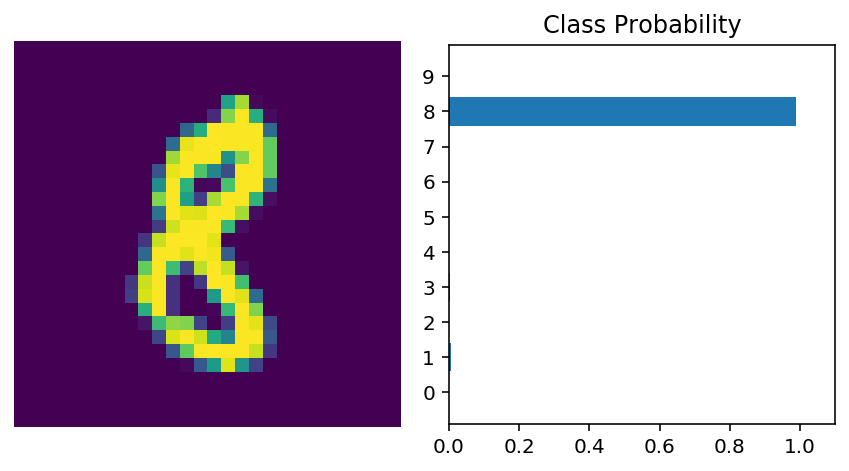

In [52]:
images, labels = next(iter(trainloader))
test_img = images[0].view(1,784)

pred = model_final.forward(test_img)

# pred contains Logits, need to take softmax to get probabilities
final_pred = F.softmax(pred)

view_classify(test_img.view(1,28,28), final_pred)